## IMPORT LIBRARIES AND MODEL

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

## DATA GATHERING

In [3]:
heart = pd.read_csv("E:\Dataset\heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## DATA PROCESSING

In [4]:
#CHECKED NUMBER OF ROWS AND COLUMNS
heart.shape

(1025, 14)

In [180]:
# Getting some info about the dataset

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [181]:
# Checking for missing values in dataset
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [182]:
heart.isnull().mean().value_counts()

0.0    14
dtype: int64

In [183]:
# Statistics measures of data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#checking the distribution of target  variables
heart['target'].value_counts() 

1    526
0    499
Name: target, dtype: int64

In [11]:
#Understanding data
#529 people in our dataseet have heart disease and 499 people has not heart disease

In [184]:
X = heart.drop(columns = 'target' , axis = 1)
y = heart['target']
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [185]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Splitting the data into Train data and Test data 

In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y) 

In [187]:
print("X_train Data ",X_train.shape)
print("Y_train Data ",y_train.shape)
print("X_test Data",X_test.shape)
print("y_test Data ",y_test.shape)


X_train Data  (820, 13)
Y_train Data  (820,)
X_test Data (205, 13)
y_test Data  (205,)


## Model Training
## Logistic Regression


In [188]:
## training the logistic Regression model with train data
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation
## Accuracy Score

In [189]:
# Accuracy on training data
X_train_Prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( X_train_Prediction , y_train )
print("Accuracy on training Data : ",training_data_accuracy)


Accuracy on training Data :  0.8524390243902439


In [190]:
# Accuracy on test data
X_test_Prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( X_test_Prediction , y_test )
print("Accuracy on test Data : ",test_data_accuracy)


Accuracy on test Data :  0.8048780487804879


In [191]:
y_pred = model.predict(X_test)

In [192]:
#3 import Dump library to Model Deployement on Django
from joblib import dump

In [193]:
dump(model, './../savedModels/model.joblib')

['./../savedModels/model.joblib']

## Doctor Recommendation System

### This System based on customer location to predict the nearest doctor .

### Making Scratch Dataset About Doctor

In [13]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

doctor_Location = np.array(['Karachi','Lahore','Islamabad','Peshawar','Multan','Quetta','Muree','Swat','Hyderabad'])[np.random.randint(0,9,50)]

In [14]:
df = pd.read_excel("E:\Dataset\doctor.xlsx")
df.columns=['Doctor_Name','Gender','Image','Contact_No']
df.head()

,Doctor_Name,Gender,Image,Contact_No
0,Dr Nasreen,Female,https://encrypted-tbn0.gstatic.com/images?q=tb...,4234567777
1,Dr Ali,Male,https://media.istockphoto.com/photos/indian-ma...,3315478547
2,Dr Hamza,Male,https://imonkey-blog.imgix.net/blog/wp-content...,3325874587
3,Dr Asma,Female,https://encrypted-tbn0.gstatic.com/images?q=tb...,3322685478
4,Dr Farah,Female,https://encrypted-tbn0.gstatic.com/images?q=tb...,3322578412


In [15]:
df.value_counts().sum()

50

In [16]:
doctor_Age = np.array(np.random.randint(24,100,50))

In [17]:
doctor_Qualification = np.array(['MBBS_Cardiologist_Specialist'])[np.random.randint(0,1,50)]

In [18]:
index = np.arange(0,50)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [19]:
df.insert(0,"Index",index,True)
df.insert(3,"Age",doctor_Age,True)
df.insert(6,"Qualification",doctor_Qualification,True)
df.insert(7,"Location",doctor_Location,True)

In [20]:
df.head()

,Index,Doctor_Name,Gender,Age,Image,Contact_No,Qualification,Location
0,0,Dr Nasreen,Female,74,https://encrypted-tbn0.gstatic.com/images?q=tb...,4234567777,MBBS_Cardiologist_Specialist,Swat
1,1,Dr Ali,Male,79,https://media.istockphoto.com/photos/indian-ma...,3315478547,MBBS_Cardiologist_Specialist,Islamabad
2,2,Dr Hamza,Male,87,https://imonkey-blog.imgix.net/blog/wp-content...,3325874587,MBBS_Cardiologist_Specialist,Islamabad
3,3,Dr Asma,Female,47,https://encrypted-tbn0.gstatic.com/images?q=tb...,3322685478,MBBS_Cardiologist_Specialist,Quetta
4,4,Dr Farah,Female,64,https://encrypted-tbn0.gstatic.com/images?q=tb...,3322578412,MBBS_Cardiologist_Specialist,Multan


In [21]:
df.isnull().sum()

Index            0
Doctor_Name      0
Gender           0
Age              0
Image            0
Contact_No       0
Qualification    0
Location         0
dtype: int64

In [22]:
df.value_counts().sum()

50

In [23]:
combined_features = df['Doctor_Name']+' '+df['Location']
combined_features

0           Dr Nasreen Swat
1          Dr Ali Islamabad
2        Dr Hamza Islamabad
3            Dr Asma Quetta
4           Dr Farah Multan
5      Dr Kashif  Islamabad
6          Dr Ismail Lahore
7            Dr Huma Lahore
8           Dr Tanib Quetta
9        Dr Sameer Peshawar
10         Dr Rafy' Karachi
11            Dr Ana Quetta
12          Dr Hafsa Lahore
13         Dr Rehan Karachi
14     Dr Manahil Islamabad
15      Dr Rahima Hyderabad
16        Dr Fahad Peshawar
17             Dr Ahad Swat
18            Dr Noor Muree
19         Dr Afsha Karachi
20      Dr Huzaifa Peshawar
21        Dr Saad Hyderabad
22        Dr Ansha Peshawar
23    Dr Sharjeel Islamabad
24       Dr Rubab Islamabad
25         Dr Amna Peshawar
26     Dr Malaika Hyderabad
27         Dr Ramsha Multan
28        Dr Maham Peshawar
29     Dr Faizyab Islamabad
30      Dr Zohaib Islamabad
31          Dr Anaya Quetta
32          Dr Kainat Muree
33           Dr Majid Muree
34      Dr Wahaj  Islamabad
35       Dr Maliha P

In [24]:
#converting the text data into feature extraction
vectorizer = TfidfVectorizer()


In [25]:
feature_vector = vectorizer.fit_transform(combined_features)
print(feature_vector)

  (0, 54)	0.6607032672283722
  (0, 40)	0.7305903561089229
  (0, 13)	0.17236276928151137
  (1, 25)	0.5168375396472056
  (1, 3)	0.8332094798739856
  (1, 13)	0.19657293877730378
  (2, 21)	0.8332094798739856
  (2, 25)	0.5168375396472056
  (2, 13)	0.19657293877730378
  (3, 43)	0.5654769115320893
  (3, 11)	0.8027269402690245
  (3, 13)	0.1893814190739406
  (4, 38)	0.5479026600459186
  (4, 17)	0.8141902089244116
  (4, 13)	0.19208586310873962
  (5, 30)	0.806207800445761
  (5, 25)	0.5529862395124981
  (5, 13)	0.21032166177128322
  (6, 31)	0.6065351759971543
  (6, 26)	0.7738132323563633
  (6, 13)	0.1825600222072127
  (7, 22)	0.7738132323563633
  (7, 31)	0.6065351759971543
  (7, 13)	0.1825600222072127
  (8, 55)	0.8027269402690245
  :	:
  (41, 13)	0.1825600222072127
  (42, 14)	0.7738132323563633
  (42, 28)	0.6065351759971543
  (42, 13)	0.1825600222072127
  (43, 10)	0.8332094798739856
  (43, 42)	0.5168375396472056
  (43, 13)	0.19657293877730378
  (44, 50)	0.8141902089244116
  (44, 38)	0.547902660045

In [26]:
## getting the similarity score using cosine similarity
similarity = cosine_similarity(feature_vector)

In [27]:
print(similarity)

[[1.         0.03388186 0.03388186 ... 0.03530896 0.03388186 0.03146655]
 [0.03388186 1.         0.30576196 ... 0.04026847 0.03864092 0.03588636]
 [0.03388186 0.30576196 1.         ... 0.04026847 0.03864092 0.03588636]
 ...
 [0.03530896 0.04026847 0.04026847 ... 1.         0.04026847 0.03739789]
 [0.03388186 0.03864092 0.03864092 ... 0.04026847 1.         0.03588636]
 [0.03146655 0.03588636 0.03588636 ... 0.03739789 0.03588636 1.        ]]


In [28]:
print(similarity.shape)

(50, 50)


In [29]:
# creating a list of all the location name given in the dataset

# getting the location from the user

In [30]:
list_of_all_location = df["Location"].tolist()
print(list_of_all_location)

['Swat', 'Islamabad', 'Islamabad', 'Quetta', 'Multan', 'Islamabad', 'Lahore', 'Lahore', 'Quetta', 'Peshawar', 'Karachi', 'Quetta', 'Lahore', 'Karachi', 'Islamabad', 'Hyderabad', 'Peshawar', 'Swat', 'Muree', 'Karachi', 'Peshawar', 'Hyderabad', 'Peshawar', 'Islamabad', 'Islamabad', 'Peshawar', 'Hyderabad', 'Multan', 'Peshawar', 'Islamabad', 'Islamabad', 'Quetta', 'Muree', 'Muree', 'Islamabad', 'Peshawar', 'Multan', 'Multan', 'Muree', 'Muree', 'Quetta', 'Lahore', 'Karachi', 'Peshawar', 'Multan', 'Multan', 'Quetta', 'Multan', 'Peshawar', 'Hyderabad']


In [31]:
#finding the close match for the location name given by the user
finding_close_match = difflib.get_close_matches('Hyderabad',list_of_all_location)
print(finding_close_match)

['Hyderabad', 'Hyderabad', 'Hyderabad']


In [32]:
close_match = finding_close_match[0]
print(close_match)

Hyderabad


In [33]:
#find the index of the doctor with location
index_of_the_doctor = df[df.Location == close_match]['Index'].values[0]
print(index_of_the_doctor)


15


In [34]:
similarity_score = list(enumerate(similarity[index_of_the_doctor]))

In [35]:
#Sorting the location  based on their similarity score

sorted_similar_location = sorted(similarity_score , key = lambda x:x[1], reverse = True)
print(sorted_similar_location) 

[(15, 1.0), (21, 0.401213081430197), (26, 0.401213081430197), (49, 0.401213081430197), (5, 0.038396327243623345), (47, 0.037397892216271066), (1, 0.03588636006852164), (2, 0.03588636006852164), (9, 0.03588636006852164), (14, 0.03588636006852164), (16, 0.03588636006852164), (20, 0.03588636006852164), (22, 0.03588636006852164), (23, 0.03588636006852164), (24, 0.03588636006852164), (25, 0.03588636006852164), (28, 0.03588636006852164), (29, 0.03588636006852164), (30, 0.03588636006852164), (34, 0.03588636006852164), (35, 0.03588636006852164), (43, 0.03588636006852164), (48, 0.03588636006852164), (4, 0.03506719943482313), (27, 0.03506719943482313), (36, 0.03506719943482313), (37, 0.03506719943482313), (44, 0.03506719943482313), (45, 0.03506719943482313), (3, 0.03457347607177206), (8, 0.03457347607177206), (11, 0.03457347607177206), (31, 0.03457347607177206), (40, 0.03457347607177206), (46, 0.03457347607177206), (18, 0.0340024645282669), (32, 0.0340024645282669), (33, 0.0340024645282669), (38

In [36]:
#print the name of the similar location based on the index
print("Doctors Suggested For You : \n") 
i = 1
for title in sorted_similar_location:
    index = title[0]
    Name_of_index = df[df.index == index]['Doctor_Name'].values[0]
    if( i<=8):
        print(i , "." , Name_of_index)
        i+=1

Doctors Suggested For You : 

1 . Dr Rahima
2 . Dr Saad
3 . Dr Malaika
4 . Dr Yasmeen
5 . Dr Kashif 
6 . Dr Kashif
7 . Dr Ali
8 . Dr Hamza


In [37]:
##Recommendation System
def recommendation(patient_location):

    list_of_all_location = df['Location'].tolist()
    finding_close_match = difflib.get_close_matches(patient_location,list_of_all_location)
    close_match = finding_close_match[0]
    index_of_the_doctor = df[df.Location == close_match]['Index'].values[0]
    similarity_score = list(enumerate(similarity[index_of_the_doctor]))
    sorted_similar_location = sorted(similarity_score , key = lambda x:x[1], reverse = True)
    
    data = []
    i = 1
    for title in sorted_similar_location:
         index = title[0]

         Name_Index = df[df.index == index]['Doctor_Name'].values[0]
         Gender_Index = df[df.index == index]['Gender'].values[0] 
         Age_Index = df[df.index == index]['Age'].values[0]
         Contact_Index = df[df.index == index]['Contact_No'].values[0] 
         Qualification_Index = df[df.index == index]['Qualification'].values[0]
         Location_Index = df[df.index == index]['Location'].values[0] 
         Image_Index = df[df.index == index]['Image'].values[0] 
         
         item = []
         if( i<=8):
             print(i,Name_Index,Gender_Index,Age_Index,Contact_Index,Qualification_Index,Location_Index,Image_Index)
             item.append(Name_Index)
             item.append(Gender_Index)
             item.append(Age_Index)
             item.append(Contact_Index)
             item.append(Qualification_Index)
             item.append(Location_Index)   
             item.append(Image_Index)
            
             data.append(item)
             i+=1
    return data       

1 Dr Farah Female 64 3322578412 MBBS_Cardiologist_Specialist Multan https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjy54R-AknqoLrtu3k3LQffRll6BXm7y1YdTzjWdS34tQz2UrwKFlLaKEheFV3pmurMxs&usqp=CAU
2 Dr Kashif Male 37 3365687412 MBBS_Cardiologist_Specialist Multan https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZM1dQ8crjbgC40Zw_c69n9ppCe63Lm6H4JhQMB8InLV_5Lv0NyXr2GSKWpbzQxT2ZEWU&usqp=CAU
3 Dr Ramsha Female 62 3369874587 MBBS_Cardiologist_Specialist Multan https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRI0zZ0HTExM_4lbMI84sR7rXvwOOliI_kKNw&usqp=CAU
4 Dr Kashaf Female 83 3366545120 MBBS_Cardiologist_Specialist Multan 
5 Dr Hammad Male 97 3369856784 MBBS_Cardiologist_Specialist Multan https://st2.depositphotos.com/1005682/5941/i/950/depositphotos_59417187-stock-photo-indian-male-doctor-outdoor.jpg
6 Dr Sallar Male 43 3322545874 MBBS_Cardiologist_Specialist Multan https://thumbs.dreamstime.com/b/smiling-young-handsome-professional-male-doctor-looking-distance-glasses-white-
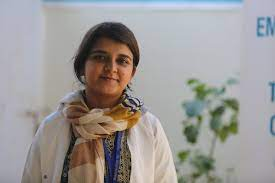
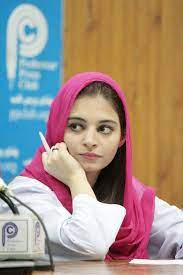

[['Dr Farah',
  'Female',
  64,
  3322578412,
  'MBBS_Cardiologist_Specialist',
  'Multan',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjy54R-AknqoLrtu3k3LQffRll6BXm7y1YdTzjWdS34tQz2UrwKFlLaKEheFV3pmurMxs&usqp=CAU'],
 ['Dr Kashif',
  'Male',
  37,
  3365687412,
  'MBBS_Cardiologist_Specialist',
  'Multan',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZM1dQ8crjbgC40Zw_c69n9ppCe63Lm6H4JhQMB8InLV_5Lv0NyXr2GSKWpbzQxT2ZEWU&usqp=CAU'],
 ['Dr Ramsha',
  'Female',
  62,
  3369874587,
  'MBBS_Cardiologist_Specialist',
  'Multan',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRI0zZ0HTExM_4lbMI84sR7rXvwOOliI_kKNw&usqp=CAU'],
 ['Dr Kashaf',
  'Female',
  83,
  3366545120,
  'MBBS_Cardiologist_Specialist',
  'Multan',
  ''],
 ['Dr Hammad',
  'Male',
  97,
  3369856784,
  'MBBS_Cardiologist_Specialist',
  'Multan',
  'https://st2.depositphotos.com/1005682/5941/i/950/depositphotos_59417187-stock-photo-indian-male-doctor-outdoor.jpg'],
 ['Dr Sallar',
  'Male',
  4
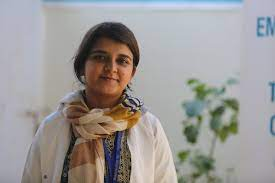
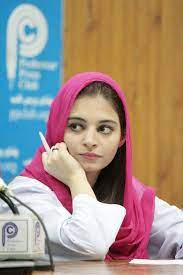

In [38]:
recommendation('Multan')

In [309]:
dump(df, './../savedModels/df.joblib')
dump( similarity_score,'./../savedModels/similarityscore.joblib')
dump( similarity,'./../savedModels/similarity.joblib')

dump( close_match,'./../savedModels/close_match.joblib')
dump( index_of_the_doctor,'./../savedModels/index_of_the_doctor.joblib')
dump( sorted_similar_location,'./../savedModels/sorted_similar_location.joblib')
dump( list_of_all_location,'./../savedModels/list_of_all_location.joblib')
dump( finding_close_match,'./../savedModels/finding_close_match.joblib')
dump( recommendation ,'./../savedModels/recommendation.joblib')


['./../savedModels/recommendation.joblib']